In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "./train_set/"
val_dir = "./val_set/"
test_dir = "./test_set/"

target_img_shape = (64, 64)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(train_dir, target_size=target_img_shape, batch_size=32, class_mode='binary')

Found 2002 images belonging to 2 classes.


In [5]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory(val_dir, target_size=target_img_shape, batch_size=32, class_mode='binary')

Found 400 images belonging to 2 classes.


[0 1] [1001 1001]


<BarContainer object of 2 artists>

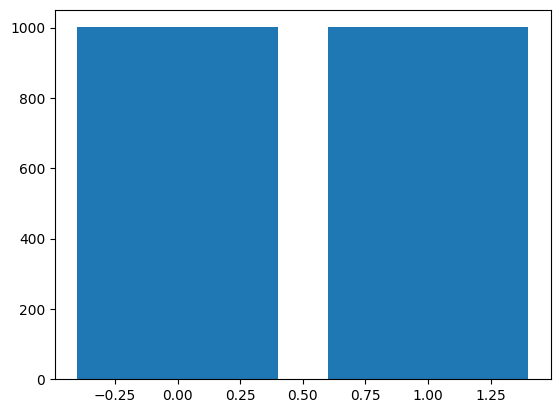

In [7]:
# visualize some images
ids, count = np.unique(train_set.classes, return_counts=True)
print(ids, count)
plt.bar(ids, count)

In [11]:
# train set
labels = (train_set.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

for i in ids:
    print(labels[i], count[i])

{'cat': 0, 'dog': 1}
{0: 'cat', 1: 'dog'}
cat 1001
dog 1001


In [12]:
# validation set
ids, count = np.unique(val_set.classes, return_counts=True)
print(ids, count)


[0 1] [200 200]


In [13]:
for image_batch, label_batch in train_set:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (20, 64, 64, 3)
Label batch shape:  (20,)


In [14]:
# create model
input_shape = (target_img_shape[0], target_img_shape[1], 3)
print(input_shape)

(64, 64, 3)


In [17]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Conv2D layer with 32 filters, 3x3 kernel, relu activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

# Conv2D layer with 64 filters, 3x3 kernel, relu activation function
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Conv2D layer with 128 filters, 3x3 kernel, relu activation function
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# flatten layer
model.add(Flatten())

# output layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [18]:
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# fit model
history = model.fit(train_set, epochs=20, validation_data=val_set, validation_steps=len(val_set), verbose=1)

Epoch 1/20


2023-10-25 19:50:07.588965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-10-25 19:50:07.631592: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


101/101 [==============================] - ETA: 0s - loss: 0.6972 - accuracy: 0.5155

2023-10-25 19:50:11.055100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


101/101 [==============================] - 4s 37ms/step - loss: 0.6972 - accuracy: 0.5155 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/20
101/101 [==============================] - 3s 33ms/step - loss: 0.6932 - accuracy: 0.5310 - val_loss: 0.6898 - val_accuracy: 0.5350
Epoch 3/20
101/101 [==============================] - 3s 34ms/step - loss: 0.6609 - accuracy: 0.6139 - val_loss: 0.6142 - val_accuracy: 0.6475
Epoch 4/20
101/101 [==============================] - 4s 37ms/step - loss: 0.5981 - accuracy: 0.6823 - val_loss: 0.6078 - val_accuracy: 0.6450
Epoch 5/20
101/101 [==============================] - 3s 34ms/step - loss: 0.5473 - accuracy: 0.7128 - val_loss: 0.5724 - val_accuracy: 0.6900
Epoch 6/20
101/101 [==============================] - 4s 36ms/step - loss: 0.5242 - accuracy: 0.7348 - val_loss: 0.5699 - val_accuracy: 0.7125
Epoch 7/20
101/101 [==============================] - 4s 36ms/step - loss: 0.4448 - accuracy: 0.7922 - val_loss: 0.5688 - val_accuracy: 0.7250
Epoch 8/20

In [20]:
# evaluate model
loss, accuracy = model.evaluate(val_set)

print("Loss: ", loss)
print("Accuracy: ", accuracy)


 1/13 [=>............................] - ETA: 1s - loss: 3.5297 - accuracy: 0.5312

2023-10-25 19:51:56.878045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 2s 135ms/step - loss: 1.4811 - accuracy: 0.7350
Loss:  1.481114149093628
Accuracy:  0.7350000143051147


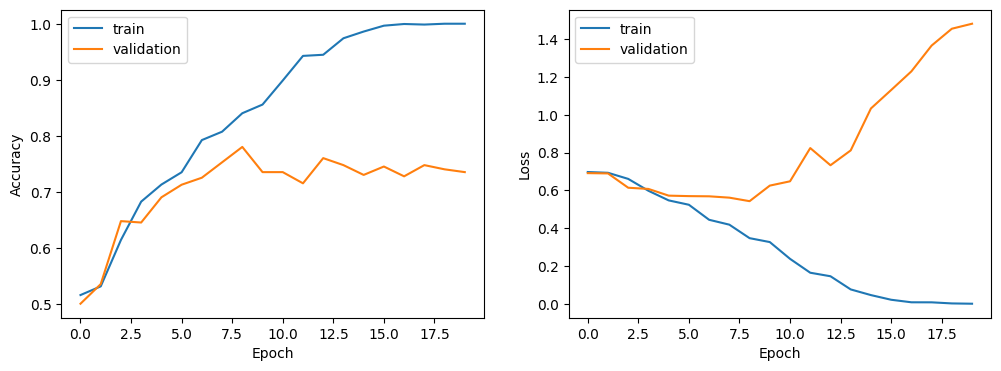

In [53]:
# plot accuracy and loss side by side
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


(64, 64, 3)


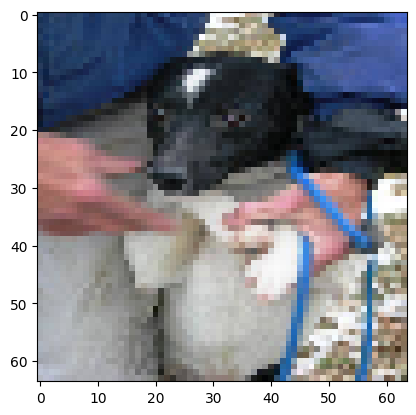

In [55]:
# predict on test set
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_img_shape = (64, 64)
test_image = load_img('./test_set/test_set/1.jpg', target_size=target_img_shape)
test_image = img_to_array(test_image)

# normalize
test_image = test_image / 255.0
print(test_image.shape)

# show image
plt.imshow(test_image)

In [56]:
# reshape to 4d
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

(1, 64, 64, 3)


In [57]:
# predict
result = model.predict(test_image)
print(result)

1/1 [==============================] - 0s 13ms/step
[[0.9714128]]


In [58]:
# get class
train_set.class_indices

{'cat': 0, 'dog': 1}

In [59]:
cls = "Dog" if result[0][0] > 0.5 else "Cat"
print(cls)

Dog


In [60]:
# predict from category function
def predict_from_category(path):
    test_image = load_img(path, target_size=target_img_shape)
    test_image = img_to_array(test_image)

    # normalize
    test_image = test_image / 255.0
    # print(test_image.shape)

    # show image
    # plt.imshow(test_image)

    # reshape to 4d
    test_image = np.expand_dims(test_image, axis=0)
    # print(test_image.shape)

    # predict
    result = model.predict(test_image)
    print(result)

    # get class
    train_set.class_indices

    cls = "Dog" if result[0][0] > 0.5 else "Cat"
    # print(cls)

    return cls

1/1 [==============================] - 0s 20ms/step
[[0.99946165]]


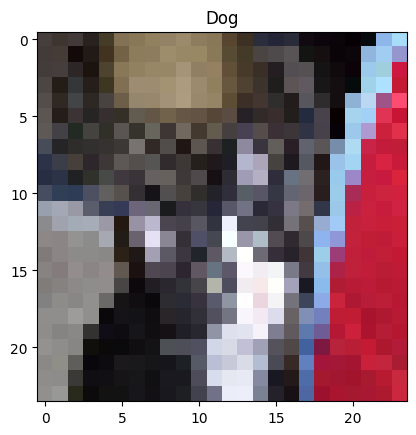

1/1 [==============================] - 0s 17ms/step
[[4.1445717e-05]]


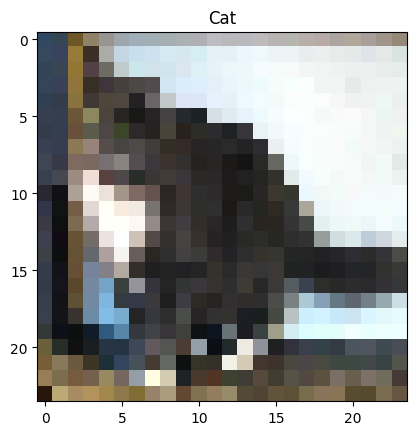

1/1 [==============================] - 0s 16ms/step
[[0.00212422]]


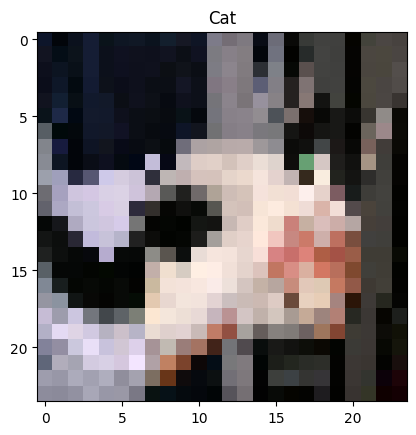

1/1 [==============================] - 0s 17ms/step
[[0.06313065]]


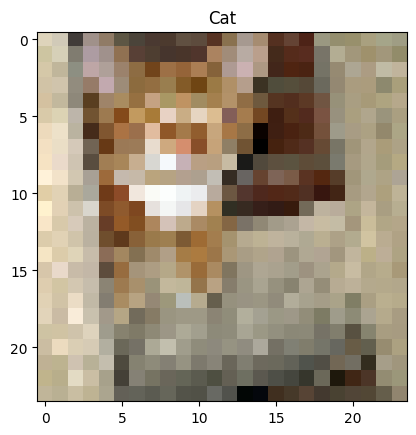

1/1 [==============================] - 0s 39ms/step
[[0.9999805]]


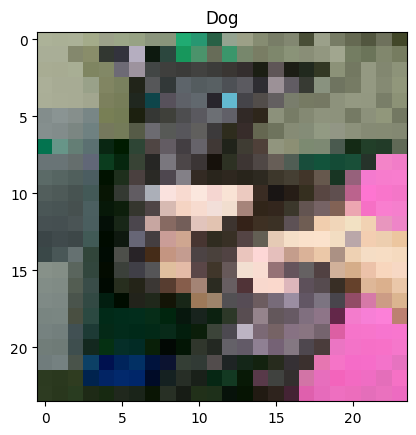

1/1 [==============================] - 0s 18ms/step
[[1.41420505e-05]]


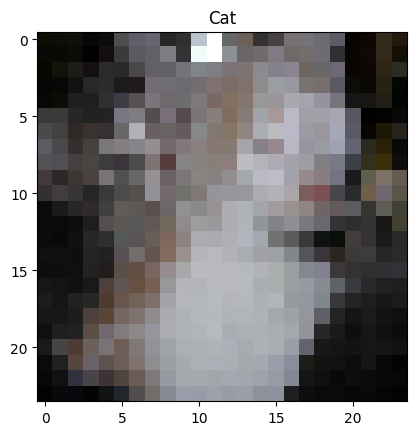

1/1 [==============================] - 0s 19ms/step
[[0.9999982]]


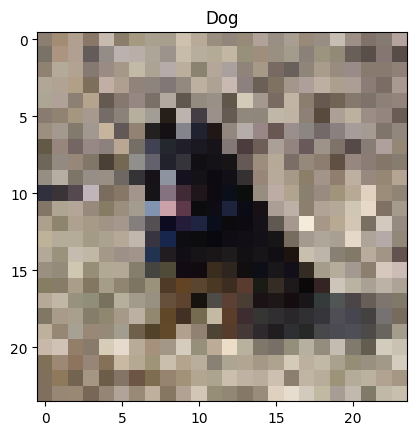

1/1 [==============================] - 0s 16ms/step
[[0.96751624]]


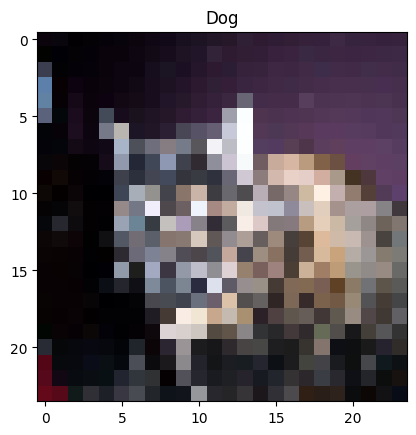

1/1 [==============================] - 0s 18ms/step
[[2.8686284e-07]]


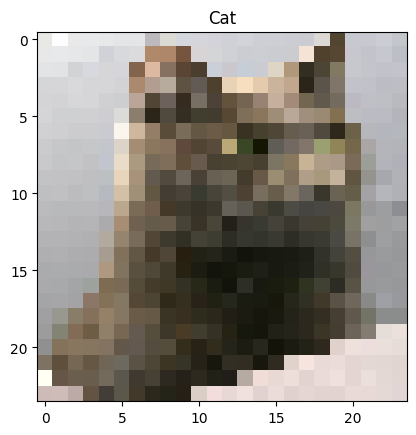

1/1 [==============================] - 0s 19ms/step
[[0.00252018]]


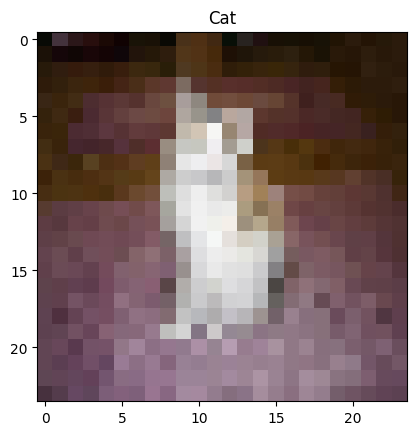

1/1 [==============================] - 0s 19ms/step
[[1.12547235e-10]]


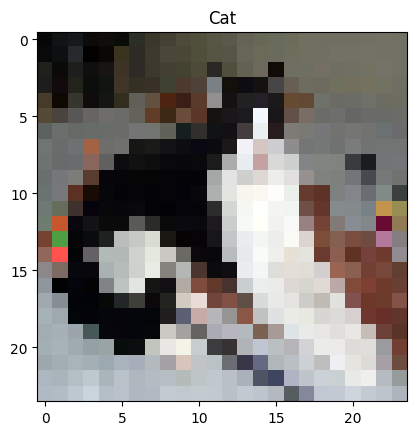

1/1 [==============================] - 0s 18ms/step
[[0.99999917]]


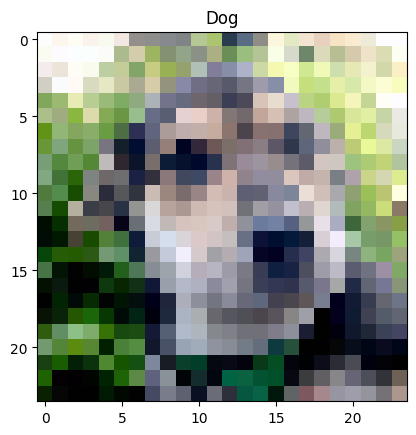

1/1 [==============================] - 0s 18ms/step
[[0.99513066]]


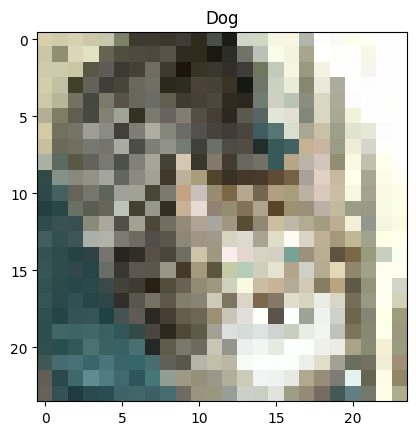

1/1 [==============================] - 0s 22ms/step
[[1.]]


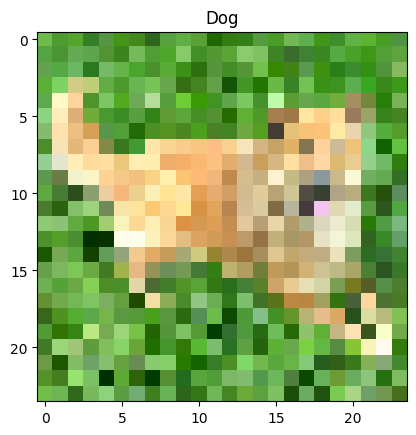

1/1 [==============================] - 0s 18ms/step
[[2.041923e-07]]


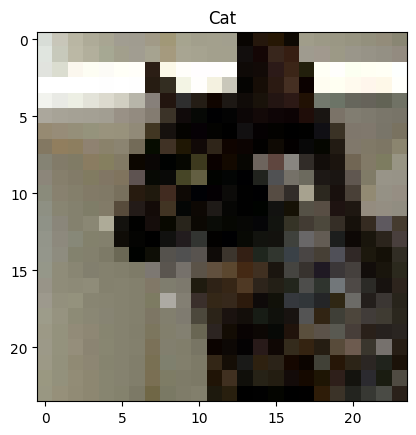

1/1 [==============================] - 0s 18ms/step
[[0.00063173]]


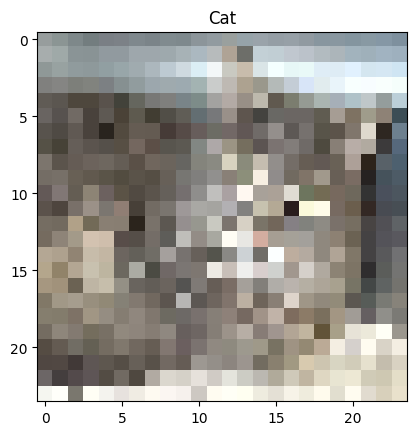

1/1 [==============================] - 0s 16ms/step
[[0.01223037]]


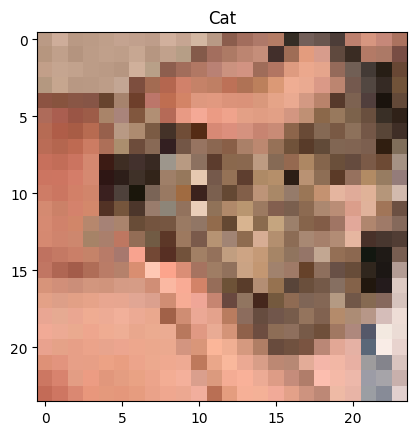

1/1 [==============================] - 0s 16ms/step
[[0.99999803]]


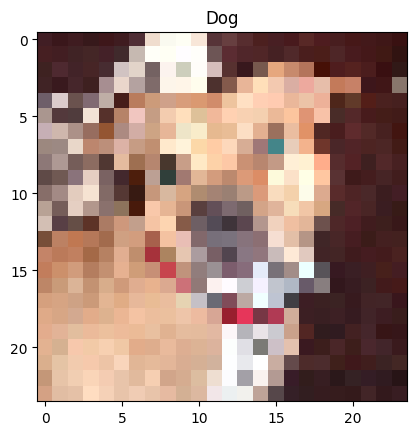

1/1 [==============================] - 0s 17ms/step
[[0.99926424]]


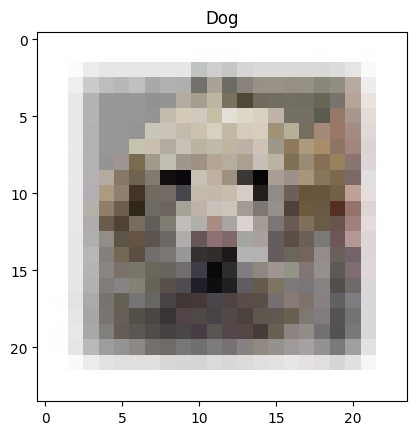

1/1 [==============================] - 0s 17ms/step
[[0.9714128]]


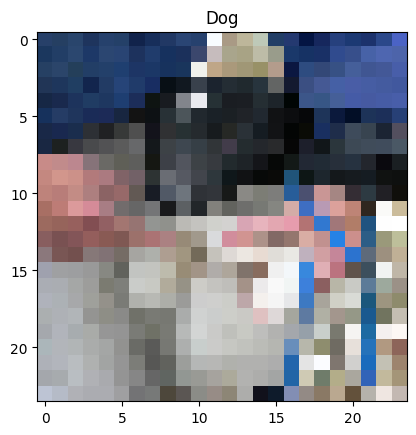

In [61]:
#  show image with prediction
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_dir = "./test_set/test_set/"


for file in os.listdir(test_dir):
    path = test_dir + file
    # print(path)
    cls = predict_from_category(path)
    plt.title(cls)
    plt.imshow(load_img(path, target_size=(24, 24)))
    plt.show()
